In [19]:
import numpy as np
import pandas as pd
import rsatoolbox
from rsatoolbox.data import Dataset
from rsatoolbox.rdm.calc import calc_rdm
import matplotlib.pyplot as plt

In [2]:
data_path = 'C:\\Users\\kem00\\OneDrive\\Documents\\Yale\\Neuromatch\\NeuroAI\\project\\data\\worm_data.xls'

In [100]:
worm1_data = pd.read_excel(data_path, 'Worm1')
worm2_data = pd.read_excel(data_path, 'Worm2')
worm3_data = pd.read_excel(data_path, 'Worm3')
worm4_data = pd.read_excel(data_path, 'Worm4')

In [4]:
worm1_data

,Time(s),x(mm),y(mm),behavior,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,...,Neuron 47,Neuron 48,Neuron 49,Neuron 50,Neuron 51,Neuron 52,Neuron 53,Neuron 54,Neuron 55,Neuron 56
0,0.000,-5.4791,1.5114,-1,0.86033,NaN,-0.029284,-0.004776,NaN,-0.216250,...,0.25548,NaN,0.082754,0.026320,-0.18304,-0.20276,NaN,NaN,NaN,-0.091548
1,0.165,-5.4771,1.5151,-1,0.89816,NaN,-0.041195,0.027495,NaN,-0.220540,...,0.25251,NaN,0.117410,0.037162,-0.20041,-0.18046,NaN,NaN,NaN,-0.051253
2,0.330,-5.4725,1.5167,-1,0.83825,0.31196,-0.052978,0.066828,0.29264,-0.224950,...,0.22088,0.110040,0.138200,0.032764,-0.22340,-0.15738,-0.18611,-0.23292,-0.093453,-0.025359
3,0.500,-5.4755,1.5171,-1,0.83344,0.35775,-0.072999,0.123440,0.28903,-0.237080,...,0.17289,0.077975,0.134000,0.020725,-0.25518,-0.14100,-0.20050,-0.23762,-0.096294,0.023741
4,0.666,-5.4709,1.5192,2,0.89089,0.57661,-0.079192,0.169710,0.30200,-0.249220,...,0.12489,0.058238,0.133590,0.006832,-0.27992,-0.12725,-0.22006,-0.24044,-0.097999,0.032782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867,312.490,-9.0282,1.3134,-1,0.34470,0.16113,0.269920,0.055892,0.16738,-0.036707,...,0.25652,0.435980,0.561410,0.331760,0.57832,0.41881,0.24710,0.10584,0.319930,0.446040
1868,312.670,-9.0210,1.3106,-1,0.38458,0.15373,0.264480,0.048561,0.16456,-0.067258,...,0.23173,0.420530,0.626910,0.369600,0.57478,0.41184,0.29427,0.13587,0.356140,0.407240
1869,312.830,-9.0154,1.3054,-1,0.37299,NaN,0.252610,NaN,0.16174,-0.097808,...,0.18849,0.352690,0.614070,0.371140,0.55164,0.39342,0.33359,0.18172,0.371180,0.373030
1870,313.000,-9.0187,1.3002,-1,0.36956,NaN,0.250500,NaN,0.16336,-0.100860,...,0.16868,0.332280,0.614170,0.378750,0.54094,0.39044,0.36538,0.20912,0.394450,0.349760


In [58]:
worm1_data.iloc[:, 4:].dropna().iloc[:1501,:]

,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,Neuron 7,Neuron 8,Neuron 9,Neuron 10,...,Neuron 47,Neuron 48,Neuron 49,Neuron 50,Neuron 51,Neuron 52,Neuron 53,Neuron 54,Neuron 55,Neuron 56
8,0.79971,0.605600,0.094463,0.328920,0.554110,-0.062036,0.083285,-0.271140,-0.290210,-0.128930,...,0.18295,0.017732,0.03699,-0.20617,-0.281780,-0.26960,-0.31825,-0.076065,0.065758,-0.218060
9,0.64314,0.347130,0.107360,0.341940,0.641220,-0.012213,0.136910,-0.240860,-0.366340,-0.109920,...,0.22599,0.076027,0.10526,-0.30170,-0.272750,-0.33838,-0.31893,-0.003124,0.054695,-0.102910
10,0.80315,0.280060,0.088907,0.368500,0.653860,-0.018441,0.183130,-0.223260,-0.421890,-0.066881,...,0.23579,0.120470,0.19242,-0.27009,-0.285430,-0.27292,-0.31081,0.046714,0.023409,0.034014
11,1.11180,0.212570,0.013661,0.366880,0.665350,-0.082586,0.143710,-0.225410,-0.426290,-0.019998,...,0.18259,0.148920,0.27811,-0.23848,-0.301960,-0.18683,-0.30654,0.042542,-0.007878,0.134960
12,1.41250,0.151340,-0.053140,0.356430,0.608260,-0.146730,0.028516,-0.238090,-0.378640,0.004170,...,0.12939,0.160710,0.29107,-0.19015,-0.314370,-0.13515,-0.29842,0.002452,-0.061293,0.196220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,0.12155,0.061433,0.053828,0.102300,0.220450,0.149490,-0.074671,-0.111540,0.112780,0.011295,...,0.26544,0.254220,0.24793,0.17920,-0.003966,0.26646,0.35513,0.331250,0.164200,0.255840
1505,0.11827,0.054685,0.024915,0.071020,0.180040,0.165540,-0.080059,-0.148700,0.114450,0.031035,...,0.24598,0.229550,0.21445,0.21630,0.009751,0.22181,0.33726,0.304480,0.152900,0.275440
1506,0.12032,0.048122,-0.003997,0.021945,0.134150,0.156040,-0.083457,-0.133370,0.095721,0.052602,...,0.24474,0.198590,0.19079,0.26852,0.056206,0.19756,0.31505,0.236580,0.161440,0.290980
1507,0.13270,0.054622,-0.026216,-0.027562,0.087044,0.141410,-0.081267,-0.116940,0.048388,0.074170,...,0.26354,0.228710,0.18222,0.35410,0.115850,0.17169,0.25740,0.152950,0.169980,0.301310


In [57]:
worm2_data.iloc[:, 4:60].dropna()

,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,Neuron 7,Neuron 8,Neuron 9,Neuron 10,...,Neuron 47,Neuron 48,Neuron 49,Neuron 50,Neuron 51,Neuron 52,Neuron 53,Neuron 54,Neuron 55,Neuron 56
12,0.162920,0.363980,0.13354,-0.079053,-0.430910,-0.442120,-0.051145,0.125060,0.71265,0.153770,...,0.25314,-0.10759,-0.156850,-0.247700,-0.152190,0.037562,0.064306,0.18937,0.218150,-0.12991
13,0.271080,0.352610,0.16321,-0.057752,-0.379790,-0.423580,-0.051742,0.075946,0.57538,0.111960,...,0.22698,-0.12056,-0.143620,-0.257270,-0.051922,0.043204,0.049110,0.20794,0.133770,-0.17557
14,0.403620,0.392450,0.19997,-0.021243,-0.328670,-0.384500,-0.100480,0.015659,0.43658,0.071504,...,0.22048,-0.11781,-0.096603,-0.229070,0.003707,0.036532,0.033914,0.22484,0.096176,-0.16783
15,0.478800,0.388110,0.22502,0.020205,-0.293180,-0.375040,-0.099779,0.022364,0.28515,0.045283,...,0.23569,-0.11290,-0.049586,-0.194670,0.037161,0.008641,0.051839,0.24174,0.082749,-0.13880
16,0.531300,0.387690,0.23649,0.060870,-0.273420,-0.372570,-0.108600,0.051073,0.20008,0.041737,...,0.25915,-0.11356,-0.010260,-0.147150,0.056752,-0.019250,0.037656,0.20940,0.090859,-0.10976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,-0.012603,0.095639,0.15565,0.030359,0.133080,-0.076158,0.143620,0.048052,0.18812,0.117220,...,0.55619,0.46636,0.237770,0.132310,0.333760,0.382670,0.235570,0.24439,0.352610,0.17321
1509,-0.003028,0.100210,0.14398,0.019835,0.102420,-0.071105,0.154980,0.052578,0.19520,0.105960,...,0.54338,0.44787,0.244640,0.112680,0.329060,0.357710,0.231290,0.21045,0.301250,0.16434
1510,0.012147,0.104350,0.13542,0.005206,0.082491,-0.102820,0.156490,0.047643,0.19258,0.079382,...,0.52683,0.42938,0.233570,0.087739,0.327550,0.346240,0.242020,0.17914,0.289230,0.16547
1511,0.025242,0.106340,0.13677,0.000260,0.063034,-0.102100,0.169260,0.057747,0.16866,0.062003,...,0.52042,0.42768,0.239710,0.068110,0.336060,0.345970,0.255390,0.17129,0.274960,0.17965


In [110]:
worm4_data.iloc[:, 4:60].dropna().iloc[:1501,:]

,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,Neuron 7,Neuron 8,Neuron 9,Neuron 10,...,Neuron 47,Neuron 48,Neuron 49,Neuron 50,Neuron 51,Neuron 52,Neuron 53,Neuron 54,Neuron 55,Neuron 56
0,0.28182,0.59654,0.232230,0.45874,0.297510,0.38665,-0.053881,0.078851,-0.088308,-0.026260,...,0.30980,0.40294,0.27360,0.16713,-0.115250,0.582710,0.055713,-0.35542,-0.074451,0.20285
1,0.27955,0.44159,0.187180,0.46196,0.212590,0.39737,-0.018647,0.116020,-0.094444,0.030312,...,0.36909,0.39694,0.34205,0.19210,-0.095439,0.735200,0.065265,-0.34575,-0.096749,0.21203
2,0.26949,0.43972,0.145090,0.47192,0.161630,0.40930,0.002493,0.138310,-0.103990,-0.015400,...,0.34995,0.39333,0.26486,0.20707,-0.113230,0.780740,0.070995,-0.33713,-0.116120,0.23166
3,0.27950,0.42250,0.095923,0.50860,0.064621,0.44353,0.148420,0.208720,-0.116480,0.068357,...,0.44208,0.61578,0.24764,0.24620,-0.119260,0.954580,0.064680,-0.29313,-0.133960,0.26844
4,0.24539,0.48463,0.077542,0.54141,-0.032392,0.44940,0.220400,0.296610,-0.097408,-0.000386,...,0.34420,0.67684,0.24706,0.19694,-0.125290,1.011400,0.058365,-0.21997,-0.048001,0.33726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.48076,0.39268,0.039647,0.29890,0.362250,0.60526,0.213190,0.145200,0.082383,0.455330,...,0.15957,0.41396,0.42233,0.14725,0.448810,0.098928,0.580380,0.19054,0.207860,0.29652
982,0.40919,0.35347,0.030698,0.25637,0.406880,0.61672,0.219050,0.178340,0.100660,0.448940,...,0.14717,0.37104,0.39954,0.12773,0.431470,0.106770,0.553480,0.21425,0.238430,0.30457
983,0.44243,0.29856,0.021749,0.21642,0.440190,0.63031,0.232330,0.263160,0.116650,0.486450,...,0.15252,0.28593,0.42539,0.11961,0.407250,0.123810,0.532420,0.23795,0.227290,0.30856
984,0.40080,0.23239,0.038961,0.17267,0.457370,0.63423,0.245050,0.320160,0.118870,0.507800,...,0.13953,0.20985,0.45329,0.16353,0.364980,0.136410,0.382670,0.23997,0.216100,0.30593


In [111]:
worm1_rsadata = rsatoolbox.data.Dataset(worm1_data.iloc[:, 4:60].dropna().iloc[:986,:].to_numpy())
worm1_rdm = rsatoolbox.rdm.calc_rdm(worm1_rsadata, method='correlation', descriptor=None, noise=None)

worm2_rsadata = rsatoolbox.data.Dataset(worm2_data.iloc[:, 4:60].dropna().iloc[:986,:].to_numpy())
worm2_rdm = rsatoolbox.rdm.calc_rdm(worm2_rsadata, method='correlation', descriptor=None, noise=None)

worm3_rsadata = rsatoolbox.data.Dataset(worm3_data.iloc[:, 4:60].dropna().iloc[:986,:].to_numpy())
worm3_rdm = rsatoolbox.rdm.calc_rdm(worm3_rsadata, method='correlation', descriptor=None, noise=None)

worm4_rsadata = rsatoolbox.data.Dataset(worm4_data.iloc[:, 4:60].dropna().iloc[:986,:].to_numpy())
worm4_rdm = rsatoolbox.rdm.calc_rdm(worm4_rsadata, method='correlation', descriptor=None, noise=None)

In [112]:
rdms = rsatoolbox.rdm.concat([worm1_rdm, worm2_rdm, worm4_rdm])
rdms_comp = rsatoolbox.rdm.compare(rdms, rdms, method='cosine')
rdms_comp = 1 - rdms_comp
rdms_comp = np.nan_to_num(rdms_comp, nan=0.0)
rdms_comp = (rdms_comp + rdms_comp.T) / 2.0

In [113]:
rdms_comp

array([[-2.22044605e-16,  7.08795407e-02,  7.17410058e-02],
       [ 7.08795407e-02,  0.00000000e+00,  7.64387176e-02],
       [ 7.17410058e-02,  7.64387176e-02,  0.00000000e+00]])

In [114]:
worm1_rdm

rsatoolbox.rdm.RDMs(
dissimilarity_measure = 
correlation
dissimilarities = 
[[0.01096246 0.02920555 0.05430661 ... 0.00463945 0.01562624 0.00543203]]
descriptors = 
{}
rdm_descriptors = 
{'index': [0]}
pattern_descriptors = 
{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

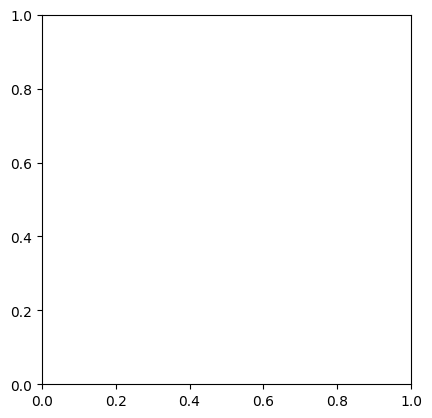

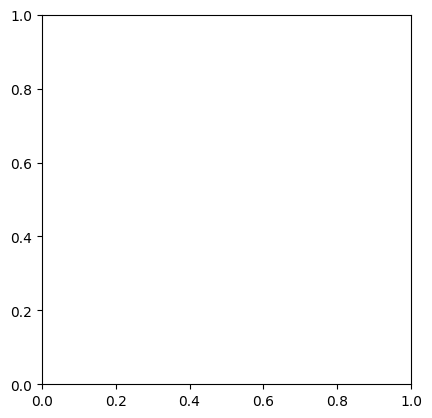

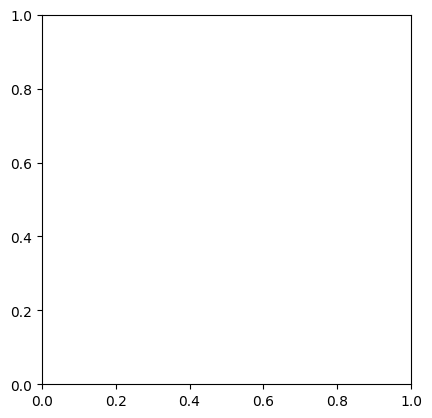

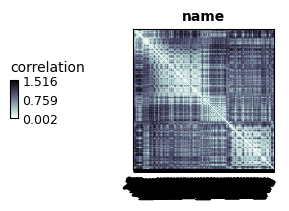

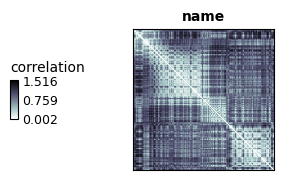

In [116]:
from rsatoolbox import vis
import matplotlib.pyplot as plt
vis.show_rdm(worm1_rdm, rdm_descriptor='name', show_colorbar='figure')
plt.show()

In [79]:
rdms_comp = rsatoolbox.rdm.compare(worm1_rdm, worm2_rdm, method='cosine')

In [80]:
rdms_comp

array([[0.81146899]])

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

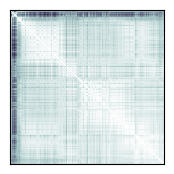

In [72]:
rsatoolbox.vis.show_rdm(worm1_rdm)
plt.show()